<a href="https://colab.research.google.com/github/eugeinga/CODER-DataScienceII/blob/main/DataScienceII_EugeniaIngaramo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Portada](https://github.com/eugeinga/CODER-DataScienceII/raw/main/IMG/IMG-BannerCODER.jpg)

# **DATA SCIENCE II: Machine Learning para la Ciencia de Datos**


* **Comisión:** 61605
* **Profesor:** Jorge Ruiz
* **Tutor:** Mateo Bongiorno / Anderson Ocaña
* **Estudiante:** [Eugenia Ingaramo](https://www.linkedin.com/in/eugeniaingaramo/)

## **PROYECTO FINAL (Pre-entrega): Análisis de la calidad de vinos de Portugal**

### **🌀 Introducción**

Mediante este proyecto se pretende analizar los datos vinculados a la calidad de los vinos de Portugal. Para ello, se plantearán distintas hipótesis que serán evaluadas mediante análisis estadístico. Se espera, además, identificar patrones y/o tendencias que pudieran predecir la calificación promedio de un vino.
![Datset Cover](https://github.com/eugeinga/CODER-DataScienceII/raw/main/IMG/IMG-dataset-cover.jpg)

### **🌀 Acerca del set de datos**

##### **Wine Quality Data Set (Red & White Wine):** <https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine>

Este conjunto de datos contiene registros relacionados con las variedades tinto y blanco del vino Vinho Verde portugués. Contiene información de 1599 muestras de vino tinto y 4898 muestras de vino blanco.

Las variables de entrada en el conjunto de datos consisten en el tipo de vino (tinto o blanco) y métricas de pruebas objetivas (por ejemplo, niveles de acidez, valores de PH, ABV, etc.), mientras que la variable objetivo/salida es una puntuación numérica basada en datos sensoriales (de al menos 3 evaluaciones realizadas por expertos en vino). Cada experto calificó la calidad del vino entre 0 (muy mala) y 10 (muy excelente).

Por cuestiones de privacidad y logística, no hay datos sobre tipos de uva, marca de vino y precio de venta del vino.

### **🌀 Hipótesis**

Se establecen las siguientes hipótesis:
* La acidez fija y la acidez volátil tienen una correlación significativa con la calidad del vino.
* Niveles altos de dióxido de azufre (libre y total) afectan negativamente la calidad del vino.
* Las características químicas que más influyen en la calidad varían entre vinos blancos y tintos.

## **PROCESAMIENTO DE DATOS**

In [1]:
import pandas as pd                             # manejo de datos
import numpy as np                              # manejo de arreglos
import seaborn as sns                           # visualización de gráficos
import matplotlib.pyplot as plt                 # visualización de gráficos
#import matplotlib.style as style
import missingno as msno                        # visualización de datos faltantes
from sklearn.preprocessing import LabelEncoder  # conversión de variables categóricas

#warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid", palette="pastel") # Estilo de seaborn
#sns.color_palette()
#sns.color_palette(palette='pastel', as_cmap=True)

### **1️⃣ Adquisición de Datos**
---




In [2]:
# Lectura del dataset

url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceII/main/winequalityN.csv"
df=pd.read_csv(url,sep=',',header=0)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### **2️⃣ Data Wrangling**
---
El **Data Wrangling** consiste en limpiar, transformar y estructurar los datos para que sean más utilizables y valiosos. Este proceso es esencial porque los datos en su forma original a menudo están desordenados, incompletos o contienen errores que pueden afectar la calidad del análisis.

Como parte de esta etapa se procederá a:
- Identificar valores duplicados
- Identificar valores faltantes
- Formatear de datos
- Transformar datos (normalización, estandarización, etc.).

En este caso se trabaja con un único dataset por lo que no será necesario combinar/concatenar ficheros.

### **🔹 Variables bajo estudio**


| VARIABLE             | DECRIPCION              | MIN     | MAX       | RANGO TIPICO  |
|----------------------|-------------------------|---------|-----------|---------------|
| **type** | Tipo de vino |   |   | Blanco /Negro |
| **fixed acidity**        | Acidez fija             | 4.0 g/L | 16.0 g/L  | 4.0 - 9.0 g/L |
| **volatile acidity**     | Acidez volátil          | 0.1 g/L | 1.6 g/L   | 0.2 - 1.0 g/L |
| **citric acid** | Acido cítrico | 0.0 g/L  | 1.6 mg/L  | 0 - 0.5 g/L |
| **residual sugar** | Azúcar residual | 0.1 g/L  | 45 g/L  | 0.9 - 15.5 mg/L |
| **chlorides** | Cloruros | 0.009 g/L  | 0.6 g/L  | 0.01 - 0.2 mg/L |
| **free sulful dioxide** | Dioxido de azufre libre | 1 mg/L  | 70 mg/L  | 10 - 50 mg/L |
| **total sulful dioxide** | Dioxido de azufre total | 6 mg/L  | 350 mg/L  | 50 - 150 mg/L |
| **density** | Densidad | 0.90 g/cm³  | 1.01 g/cm³  | 0.99 - 1.00 g/cm³ |
| **pH** | pH | 2.75  | 4.00  | 3.00 - 4.00 |
| **sulphates** | Sulfatos | 0.3 g/L  | 2.0 g/L  | 0.3 - 0.6 g/L |
| **alcohol** | Alcohol | 8 %  | 15 %  | 11 - 14 % |
| **quality** | Calidad | 1  | 10  | 1 - 10 |




* **Acidez fija:** La acidez fija es responsable del sabor ácido del vino. Los vinos con una acidez fija en el rango rípico suelen tener un sabor fresco y equilibrado. Los valores más altos son más comunes en vinos blancos y espumosos.
* **Acidez volátil:** Niveles altos de acidez volátil pueden dar un sabor avinagrado al vino, lo cual generalmente es un defecto.
* **Ácido cítrico:**	Es un ácido que agrega frescura y un sabor afrutado al vino. Su presencia en pequeñas cantidades es deseable.
* **Azúcar residual:**	Es el azúcar que queda en el vino después de la fermentación. Los vinos con menos azúcar residual son secos, mientras que los vinos con más azúcar residual son dulces.
* **Cloruros:**	Se refiere al contenido de sal en el vino, que puede influir en su sabor y cuerpo. Niveles altos pueden dar un sabor salado, lo que generalmente es indeseable.
* **Dióxido de azufre libre:**	Es el dióxido de azufre que no está ligado a otros compuestos en el vino y actúa como un conservante, ayudando a prevenir la oxidación y el crecimiento microbiano. Los vinos blancos y rosados suelen requerir más dióxido de azufre libre que los tintos.
* **Dióxido de azufre total:**	Es la suma del dióxido de azufre libre y el combinado. Un nivel adecuado es importante para la conservación del vino, pero niveles demasiado altos pueden causar un sabor fuerte y desagradable. Los valores máximos permitidos varían según la legislación de cada país, generalmente se permite hasta 200 mg/L para vinos tintos y hasta 350 mg/L para vinos blancos y rosados.
* **Densidad:**	Se refiere a la relación entre la masa y el volumen del vino. Está estrechamente relacionada con el contenido de azúcar y alcohol; un vino más dulce o con más alcohol generalmente tendrá mayor densidad. Los vinos secos tienden a estar más cerca del rango inferior, mientras que los vinos dulces están en el extremo superior.
* **pH:**	Mide la acidez o alcalinidad del vino. Un pH bajo (común en vinos blancos) indica alta acidez, lo que contribuye a la frescura y estabilidad del vino.
* **Sulfatos:**	Los sulfatos, como el sulfato de potasio, son aditivos que pueden usarse para estabilizar el vino y mejorar su claridad. En cantidades excesivas pueden influir negativamente en el sabor y la sensación en boca.
* **Alcohol:**	Indica el porcentaje de alcohol por volumen en el vino. Afecta el cuerpo, el sabor y la percepción general del vino. Un vino con más alcohol puede parecer más cálido y robusto. Los vinos de mesa suelen estar en el rango de 11% a 14%.
* **Calidad:**	Este es un valor subjetivo basado en una evaluación sensorial y puede variar ampliamente según el catador y el tipo de vino. Un vino de alta calidad generalmente estará en el rango de 7 a 10.

In [3]:
# Información de resumen del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# Dimensiones del dataset [filas, columnas]
df.shape

(6497, 13)

El dataset bajo estudio cuenta con 6497 filas y 13 columnas de las cuales 12 corresponden a variables independientes a analizar y 1 a la variable dependiente u objetivo.

## **🔹 Valores Duplicados**

##### Se eliminan los registros duplicados

In [5]:
print("Dimensiones del dataset original: ", df.shape)
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)
print("Dimensiones del dataset sin filas duplicadas: ", df.shape)

Dimensiones del dataset original:  (6497, 13)
Dimensiones del dataset sin filas duplicadas:  (5329, 13)


##### El dataset tiene 1170 filas duplicadas que son eliminadas dado que a los fines de este trabajo (predecir la calidad de los vinos) entradas idénticas no aportan valor; de esta manera, el dataset resultante posee 5327 filas y 13 columnas.

## **🔹 Valores faltantes**

Se identifican los valores nulos en cada una de las columnas del dataset y se rellenan con la media de cada variable según tipo de vino y calidad.

In [6]:
# Contabilizo los datos nulos/faltantes por columna.

pd.DataFrame({'Cant.NAN' : df.isna().sum(), '%NAN' : df.isna().sum() / len(df) * (100)}).round(2)

,Cant.NAN,%NAN
type,0,0.00
fixed acidity,10,0.19
volatile acidity,8,0.15
citric acid,3,0.06
residual sugar,2,0.04
chlorides,2,0.04
free sulfur dioxide,0,0.00
total sulfur dioxide,0,0.00
density,0,0.00
pH,9,0.17


<Axes: >

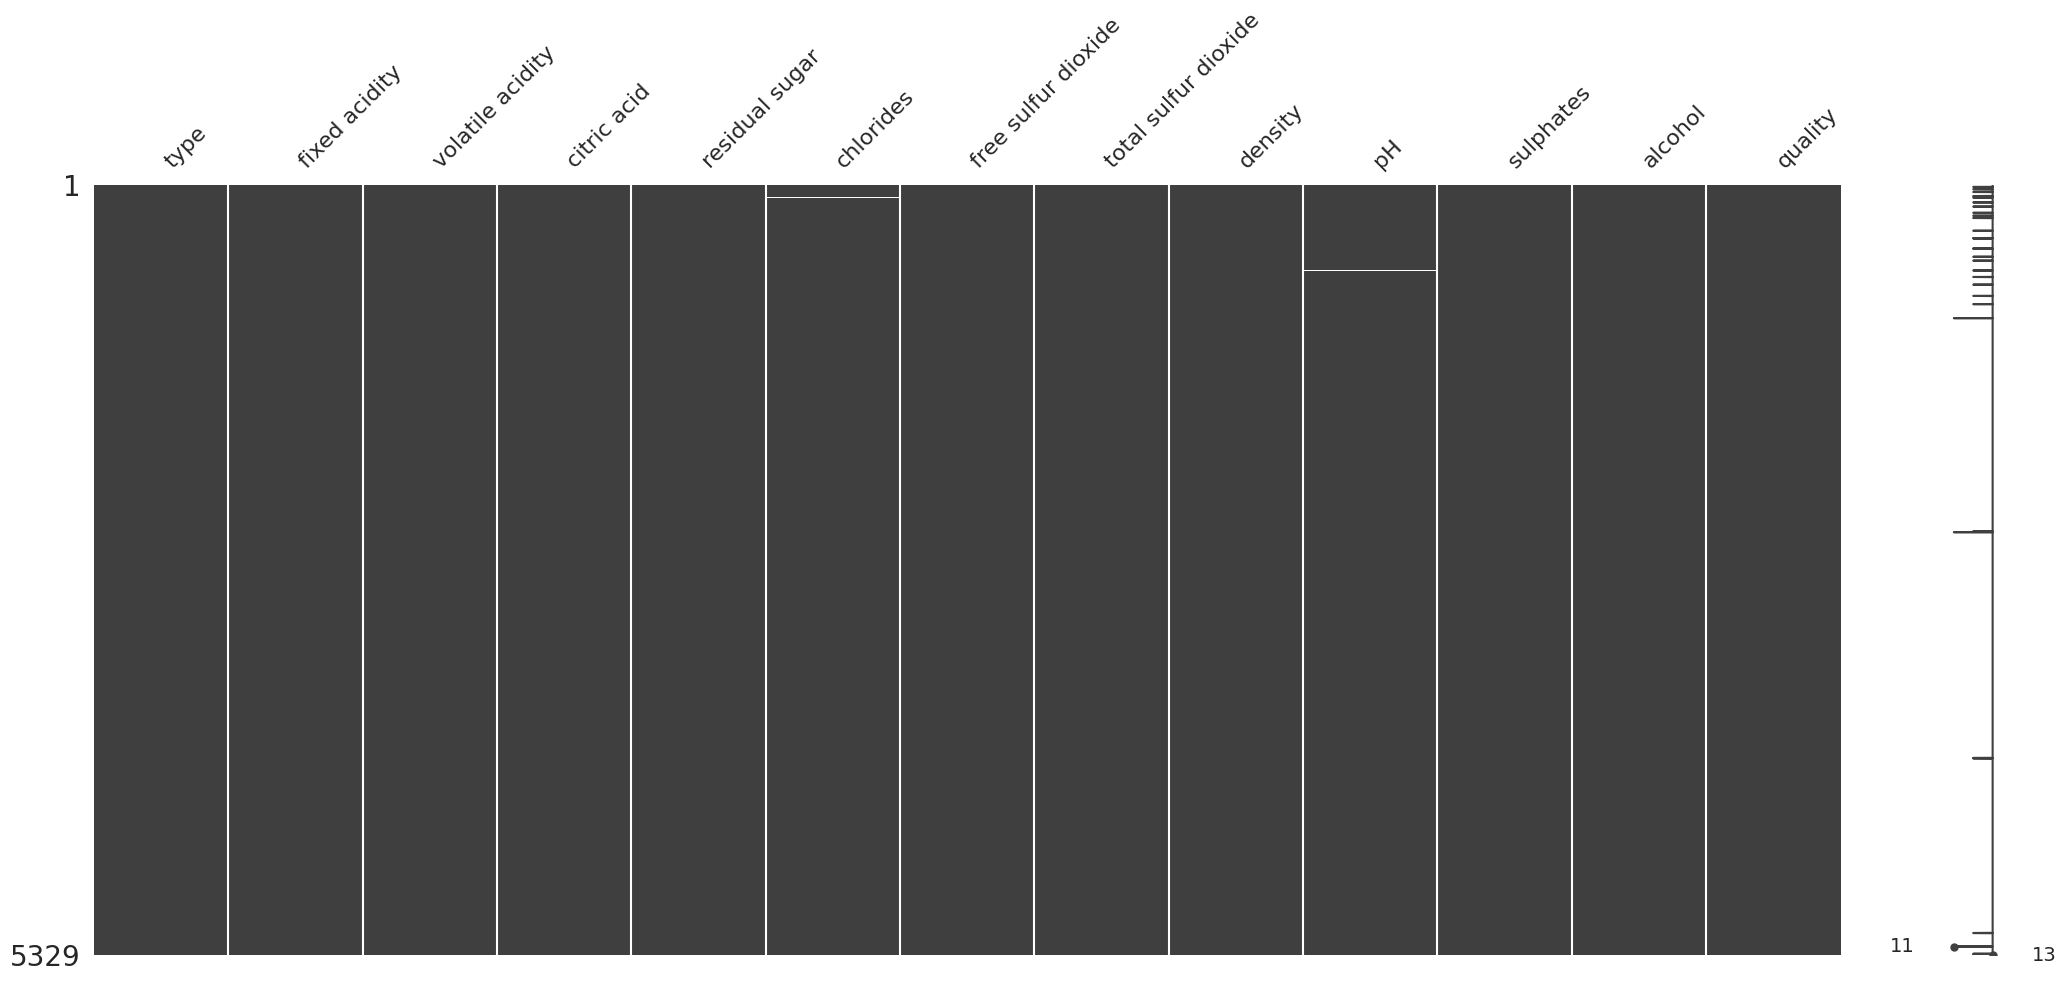

In [7]:
msno.matrix(df)

In [8]:
# Calculo los valores promedio de cada variable según tipo y calificación del vino.
df.groupby(by=['type', 'quality']).mean().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
type  quality                                                                 
red   3                 8.36              0.88         0.17            2.64   
      4                 7.78              0.69         0.17            2.69   
      5                 8.17              0.58         0.24            2.51   
      6                 8.34              0.50         0.28            2.46   
      7                 8.86              0.40         0.37            2.72   
      8                 8.44              0.43         0.38            2.58   
white 3                 7.60              0.33         0.34            6.39   
      4                 7.14              0.38         0.31            4.50   
      5                 6.92              0.30         0.34            6.95   
      6                 6.82              0.26         0.34            5.97   
      7                 6.70              0.27         0.33            4.52   
      8                 6.61              0.29         0.34            5.03   
      9                 7.42              0.30         0.39            4.12   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
type  quality                                                                  
red   3             0.12                11.00                 24.90     1.00   
      4             0.09                12.26                 36.25     1.00   
      5             0.09                17.16                 57.41     1.00   
      6             0.09                15.64                 40.82     1.00   
      7             0.08                13.99                 35.45     1.00   
      8             0.07                13.76                 34.47     1.00   
white 3             0.05                53.32                170.60     0.99   
      4             0.05                23.13                124.13     0.99   
      5             0.05                36.00                150.14     1.00   
      6             0.05                35.33                136.53     0.99   
      7             0.04                33.91                122.19     0.99   
      8             0.04                35.57                121.68     0.99   
      9             0.03                33.40                116.00     0.99   

                 pH  sulphates  alcohol  
type  quality                            
red   3        3.40       0.57     9.96  
      4        3.38       0.60    10.27  
      5        3.30       0.62     9.89  
      6        3.32       0.67    10.66  
      7        3.29       0.74    11.49  
      8        3.27       0.77    12.16  
white 3        3.19       0.47    10.34  
      4        3.19       0.48    10.20  
      5        3.17       0.48     9.86  
      6        3.20       0.49    10.64  
      7        3.23       0.50    11.51  
      8        3.24       0.49    11.89  
      9        3.31       0.47    12.18

In [9]:
# Reemplazo los datos faltantes con la media de cada columna según tipo de vino y calidad.

valoresPromedio = df.groupby(['type', 'quality']).transform('mean').round(2)
#print(valoresPromedio)
df.fillna(valoresPromedio, inplace=True)
print(df.isna().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## **🔹 Valores sospechosos**

##### Se consideran valores sospechosos los siguientes:
* los valores en cero (a excepción de 'ácido cítrico'),
* los valores negativos (aunque según los datos estadísticos no hay columnas con valores mínimos negativos).

In [10]:
# Se contabilizan los datos que son menores o igual a 0 (cero) en las columnas que según el ambito de estudio no admiten valores ceros o negativos.

valoresnulos = (df[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] <= 0).sum()
print(valoresnulos)

fixed acidity           0
volatile acidity        0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


No hay datos nulos o menores a 0 (cero) en las columnas que según el ambito de estudio no admiten valores ceros o negativos.

Coeficiente de variación (CV) de las distintas columnas

In [11]:
# Calculo el coeficiente de variación (CV) a fin de determinar la dispersión de los conjuntos de datos respecto a la media.
# Si el CV es <= 30% se dice que los datos son relativamente homogéneos.

encabezados = df.columns.values[1:]

for i in range(len(encabezados)):
  coefVar = (df[encabezados[i]].std() / df[encabezados[i]].mean()) * 100
  print(f"CV {encabezados[i]}: {coefVar.round(2)}")


CV fixed acidity: 18.27
CV volatile acidity: 48.87
CV citric acid: 46.14
CV residual sugar: 89.1
CV chlorides: 65.01
CV free sulfur dioxide: 59.27
CV total sulfur dioxide: 49.73
CV density: 0.3
CV pH: 4.97
CV sulphates: 28.07
CV alcohol: 11.24
CV quality: 15.18


In [12]:
df.nunique()

,0
type,2
fixed acidity,111
volatile acidity,187
citric acid,89
residual sugar,318
chlorides,214
free sulfur dioxide,135
total sulfur dioxide,276
density,998
pH,108


## **🔹 Cardinalidad de las variables**

In [13]:
# Cardinalidad de las variables

cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100)}).round(2)
cardinalidad

,Cantidad,Porcentaje
type,2,0.04
fixed acidity,111,2.08
volatile acidity,187,3.51
citric acid,89,1.67
residual sugar,318,5.97
chlorides,214,4.02
free sulfur dioxide,135,2.53
total sulfur dioxide,276,5.18
density,998,18.73
pH,108,2.03


## **🔹 Agrupacion de Características (Feature Binning)**

A fin de facilitar el análisis de los datos se dividen las calidades en intervalos discretos no superpuestos (bins).

In [14]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [15]:
# Analizo la distribucion de los vinos por tipo y calidad.

#df.pivot_table(df, index=['type'], aggfunc='mean').round(2)

#pivot_df = df.pivot_table(index=['type','quality'], aggfunc='size')
pivot_df = df.pivot_table(index='type',columns='quality', aggfunc='size')
#pivot_df = df.pivot_table(index=['type', 'quality'], aggfunc='size').reset_index(name='count')

print(pivot_df)

quality     3      4       5       6      7      8    9
type                                                   
red      10.0   53.0   577.0   535.0  167.0   17.0  NaN
white    20.0  153.0  1178.0  1792.0  690.0  132.0  5.0


In [16]:
# Otra forma de agrupar los datos

df.groupby(['type', 'quality']).size().reset_index(name='counts')

,type,quality,counts
0,red,3,10
1,red,4,53
2,red,5,577
3,red,6,535
4,red,7,167
5,red,8,17
6,white,3,20
7,white,4,153
8,white,5,1178
9,white,6,1792


#### Se recategorizan los vinos en gama Baja, Media, Alta y Superior en función de la calidad de los mismos (discretización).

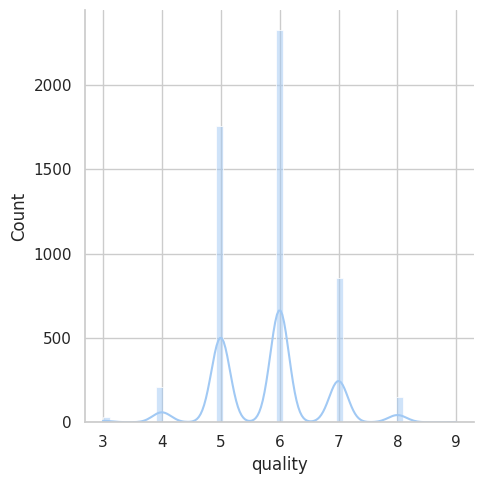

In [17]:
# Analizo la distribución de las calidades de los vinos

from seaborn import displot
displot(df.quality, kind='hist', kde=True)

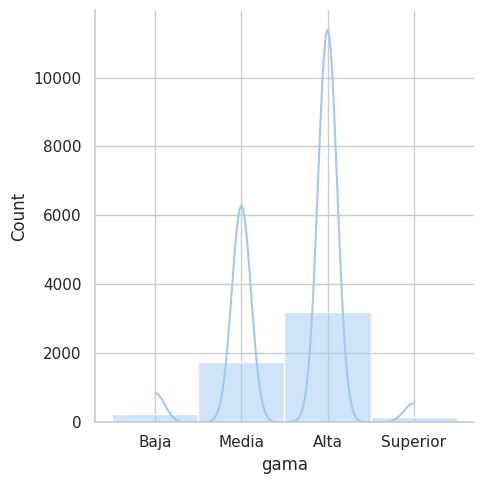

In [18]:
#df['gama'] = df['quality'].apply(lambda x: 'Baja' if x <= 4 else ('Media' if x <= 5 else ('Alta' if x <= 7 else 'Superior')))
#df['gama'] = df.quality.apply(lambda x: 'Baja' if x <= 4 else ('Media' if x <= 5 else ('Alta' if x <= 7 else 'Superior')))
rangos = ["Baja", "Media", "Alta", "Superior"]
df['gama'] = pd.cut(df['quality'], bins=[0, 4, 5, 7, 10], labels=rangos)
#df.head()
displot(df.gama, kind='hist', kde=True)

Totalizo por tipo y gama de vinos

In [19]:
pd.pivot_table(df, index='type', columns='gama', values='quality', aggfunc='count', margins=True, margins_name="TOTAL", observed=False)
#df.pivot_table(index='type', columns='gama', aggfunc='size')

gama,Baja,Media,Alta,Superior,TOTAL
type,,,,,
red,63,577,702,17,1359
white,173,1178,2482,137,3970
TOTAL,236,1755,3184,154,5329


In [20]:
pivot_table = df.pivot_table(index='quality', columns='gama', aggfunc='size', fill_value=0, observed=False)
pivot_table

gama,Baja,Media,Alta,Superior
quality,,,,
3,30,0,0,0
4,206,0,0,0
5,0,1755,0,0
6,0,0,2327,0
7,0,0,857,0
8,0,0,0,149
9,0,0,0,5


Se convierten las variables categóricas en valores numéricos para su posterior uso con los algoritmos de Machine Learning.

In [21]:
# Label encoding

diccionario = {'Baja':1, 'Media':2, 'Alta':3, 'Superior':4}
df['gamaNro'] = df['gama'].map(diccionario)
pd.pivot_table(df, index='type', columns='gamaNro', values='quality', aggfunc='count', margins=True, margins_name="TOTAL", observed=False)

gamaNro,1,2,3,4,TOTAL
type,,,,,
red,63,577,702,17,1359
white,173,1178,2482,137,3970
TOTAL,236,1755,3184,154,5329


In [22]:
df[["type", "gama", "gamaNro"]].dtypes

,0
type,object
gama,category
gamaNro,category


In [23]:
# Instancio el Laber Encoder para la transformación de datos categóricos a valores numéricos

le = LabelEncoder()
df['type'] = le.fit_transform(df['type']).astype(int)
df['gamaNro'] = le.fit_transform(df['gamaNro']).astype(int)
df[["type", "gama", "gamaNro"]].dtypes

# diccionario = {"white":1,"red":0}
#df['type'] = df['type'].map(diccionario)

,0
type,int64
gama,category
gamaNro,int64


In [24]:
df["type"].value_counts() # 0: Red / 1: White

,count
type,
1,3970
0,1359


# **🟡 PENDIENTE !!!!!!**
## **🔹 Feature Eng - Escalado: estandarización de los datos**
---

Ver clase Complementaria del 31/10, minuto 45.
Se debe hacer LUEGO de remover outliers.
Para variables numéricas


### **3️⃣ Análisis Exploratorio de Datos (EDA)**
---
Mediante en **Análisis Exploratorio de Datos** se pretende explorar y comprender los datos en detalle a fin de que cualquier análisis posterior sea válido y significativo.

Como parte de esta etapa se procederá a:
- Identificar patrones y tendencias.
- Detectar valores atípicos o anomalías.
- Comprender las relaciones entre diferentes variables.
- Preparar los datos para su transformación, asegurando que estén en el formato adecuado para el análisis.

### **🔹 Análisis Estadístico**


In [25]:
# Estadística Descriptiva

df.describe().round(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,gamaNro
count,5329.00,5329.00,5329.00,5329.00,5329.00,5329.00,5329.00,5329.00,5329.00,5329.00,5329.00,5329.00,5329.00,5329.00
mean,0.74,7.22,0.34,0.32,5.05,0.06,30.06,114.19,0.99,3.22,0.53,10.55,5.80,1.61
std,0.44,1.32,0.17,0.15,4.50,0.04,17.82,56.78,0.00,0.16,0.15,1.19,0.88,0.62
min,0.00,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00,0.00
25%,0.00,6.40,0.23,0.24,1.80,0.04,16.00,75.00,0.99,3.11,0.43,9.50,5.00,1.00
50%,1.00,7.00,0.30,0.31,2.70,0.05,28.00,116.00,0.99,3.21,0.51,10.40,6.00,2.00
75%,1.00,7.70,0.41,0.40,7.50,0.07,41.00,154.00,1.00,3.33,0.60,11.40,6.00,2.00
max,1.00,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00,3.00


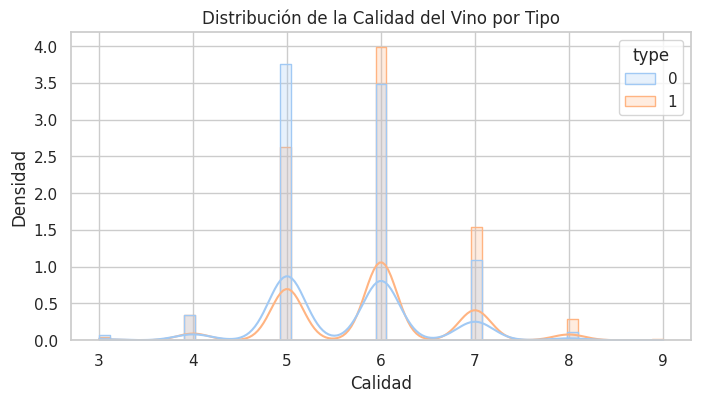

In [26]:
# Comparo la distribución de las calidades de los vinos por tipo de vino

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='quality', hue='type', kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribución de la Calidad del Vino por Tipo')
plt.xlabel('Calidad')
plt.ylabel('Densidad')
plt.show()

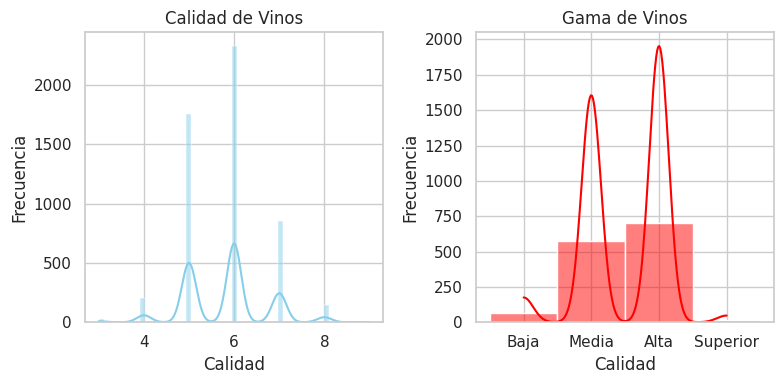

In [27]:
# Comparo la distribución de la variable calidad con la gama de vinos.

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='quality', kde=True, color='skyblue')
plt.title('Calidad de Vinos')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[df['type'] == 0]['gama'], kde=True, color='red')
plt.title('Gama de Vinos')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>],
       [<Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>],
       [<Axes: title={'center': 'quality'}>,
        <Axes: title={'center': 'gamaNro'}>, <Axes: >, <Axes: >]],
      dtype=object)

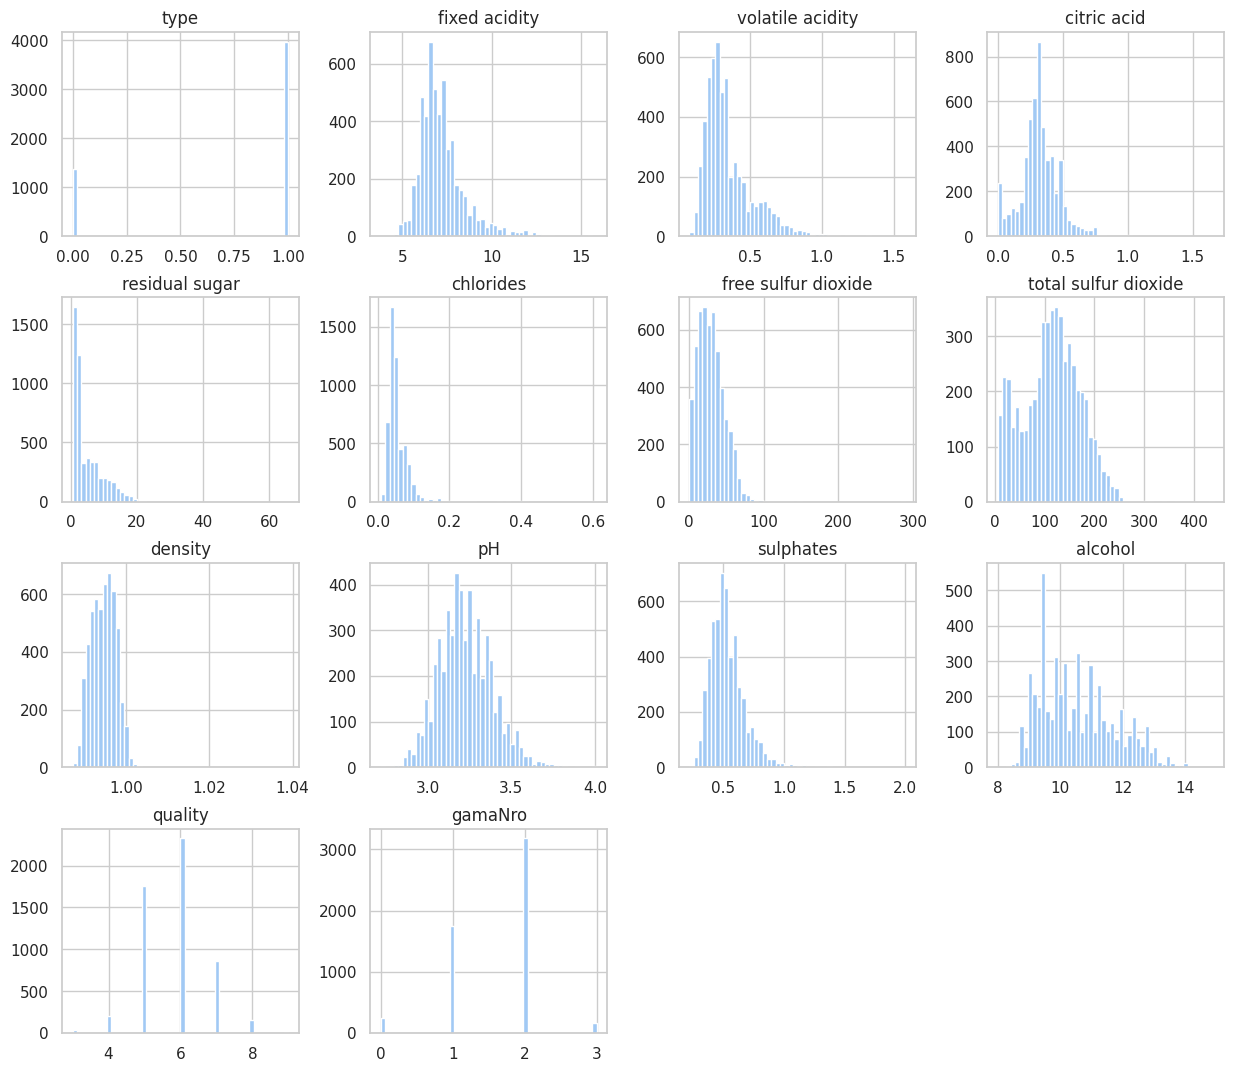

In [28]:
df.hist(figsize=(15,13),bins=50)

Muchas de las variables tienen una distribución asimétrica y/o valores extremos que son analizados en el próximo apartado.

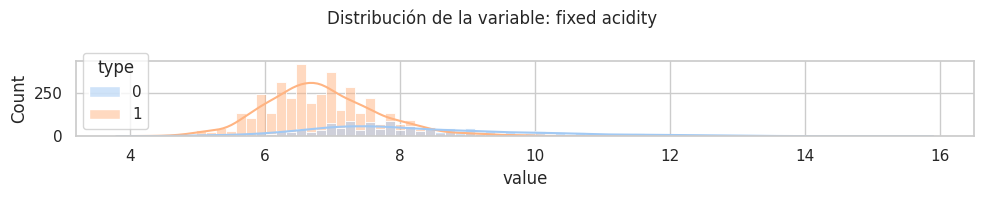

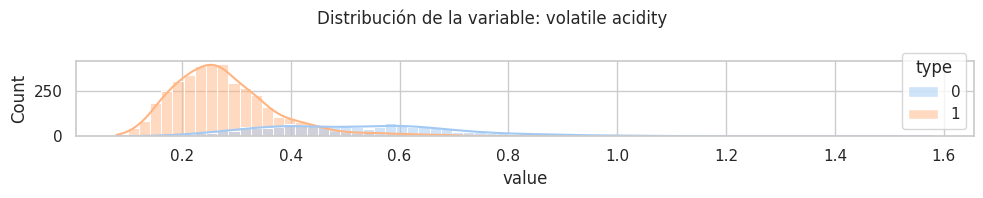

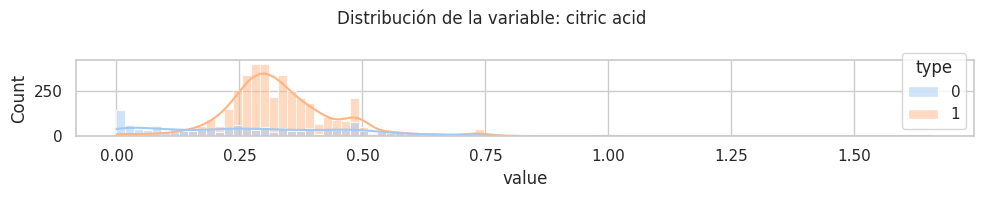

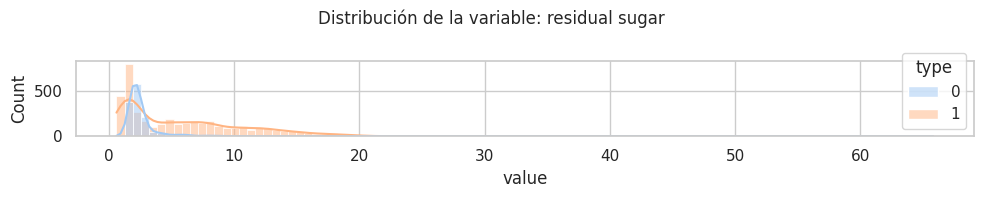

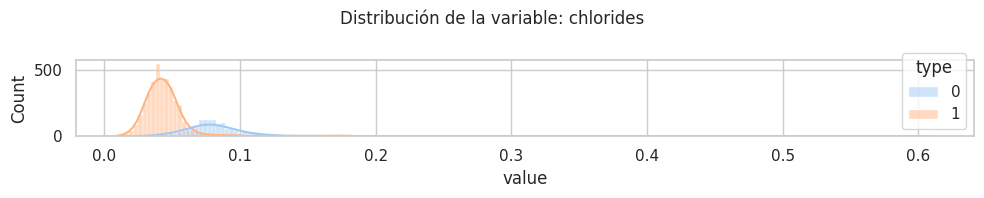

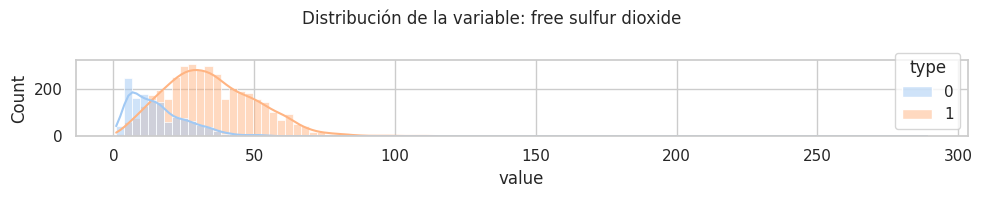

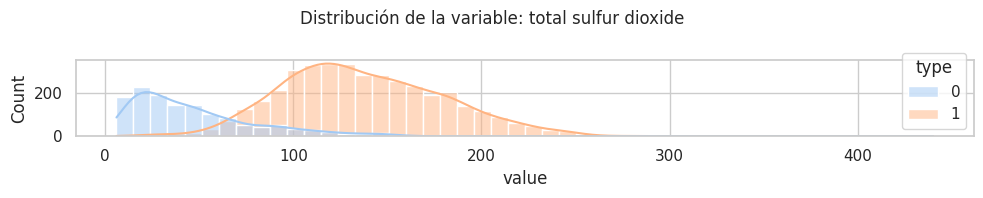

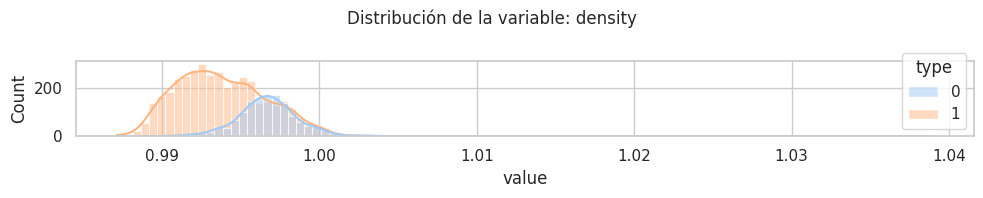

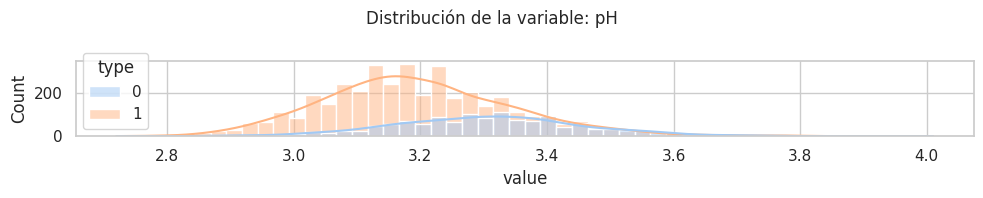

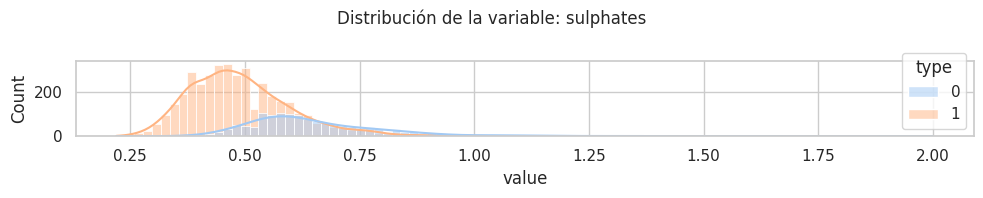

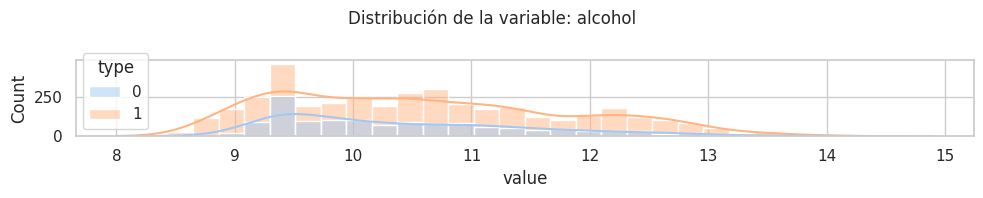

In [35]:
#BORRAR
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')

for _, feature in enumerate(numerical_features):
    fig, ax = plt.subplots(figsize=(10, 2), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=ax) # Se usa histplot con kde=True para incluir la curva de densidad
    #sns.histplot(df[feature], hue=df['type'], kde=True, ax=ax)  # Se usa histplot con kde=True para incluir la curva de densidad
    #sns.histplot(df[feature], kde=True, ax=ax)  # Se usa histplot con kde=True para incluir la curva de densidad
    #axes[0].grid()
    #axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()

🟡 Se calcula el coeficiente de variación (CV) a fin de determinar la dispersión de cada variable respecto a la media.
Si el CV es <= 30% se dice que los datos son relativamente homogéneos.

<img src="https://github.com/eugeinga/CODER-DataScienceII/raw/main/IMG/IMG-Coeficiente%20de%20Variacion.jpg" alt="Coeficiente de Variacion" width="400"/>

In [48]:
encabezados = df.columns.tolist()
encabezados.remove('gama')
encabezados.remove('gamaNro')

for i in range(len(encabezados)):
  coefVar = (df[encabezados[i]].std() / df[encabezados[i]].mean()) * 100
  print(f"CV {encabezados[i]}: {coefVar.round(2)}")

CV type: 58.51
CV fixed acidity: 18.27
CV volatile acidity: 48.87
CV citric acid: 46.14
CV residual sugar: 89.1
CV chlorides: 65.01
CV free sulfur dioxide: 59.27
CV total sulfur dioxide: 49.73
CV density: 0.3
CV pH: 4.97
CV sulphates: 28.07
CV alcohol: 11.24
CV quality: 15.18


### **🔹 Identificación de Outliers**

Mediante **boxplots** se analizan de manera gráfica y rápida los valores extremos de cada variable (numérica contínua); mientras que los **histogramas** nos permiten identificar aquellas variables cuya distribución se aproxima a la normal.

In [52]:
"""
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], ax=axes[0])
    sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad
    axes[0].grid()
    axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()
"""

"\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\n\nfor _, feature in enumerate(numerical_features):\n    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)\n    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)\n    sns.boxplot(x=df[feature], ax=axes[0])\n    sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad\n    axes[0].grid()\n    axes[1].grid()\n    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.\n    plt.show()\n"

In [51]:
"""
# Se analizan en detalle las distribuciones según el tipo de vino.

numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0])
    #sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1])
    axes[0].grid()
    axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()
"""

"\n# Se analizan en detalle las distribuciones según el tipo de vino.\n\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\ndf_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')\nfor _, feature in enumerate(numerical_features):\n    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)\n    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)\n    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0])\n    #sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad\n    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1])\n    axes[0].grid()\n    axes[1].grid()\n    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten

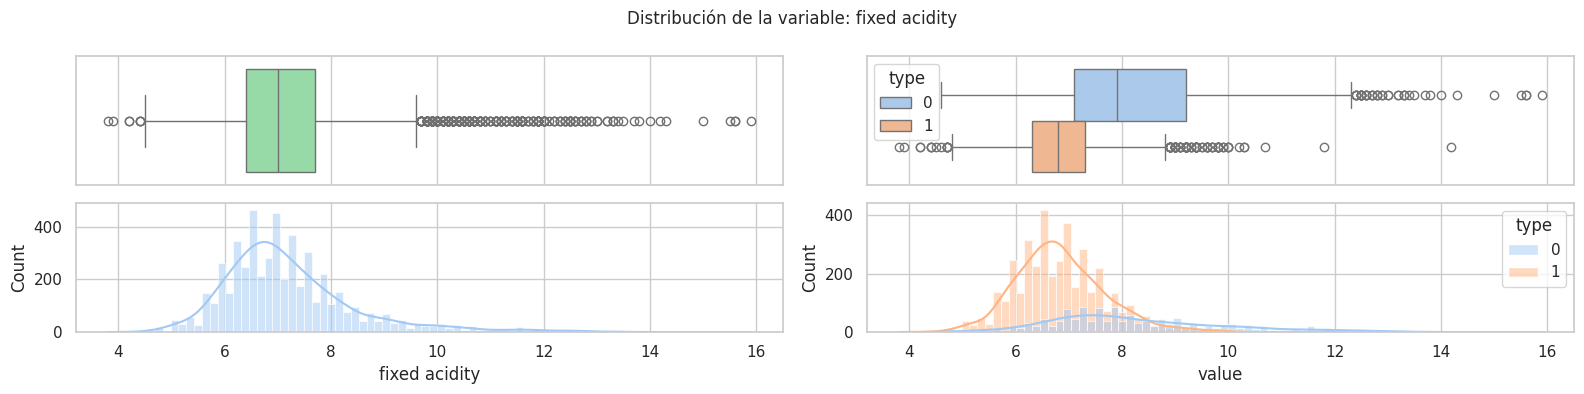

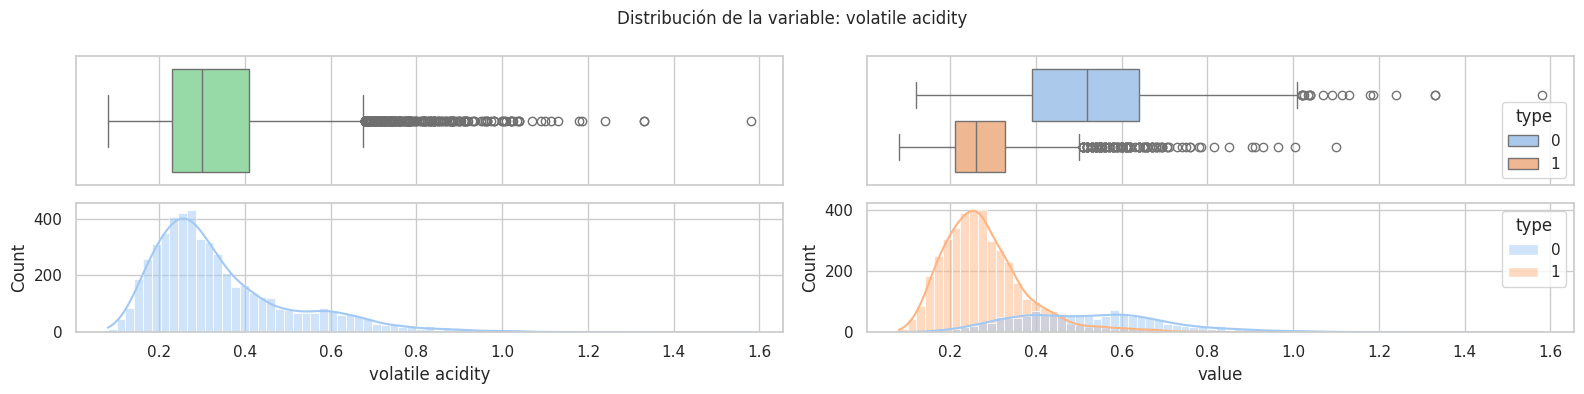

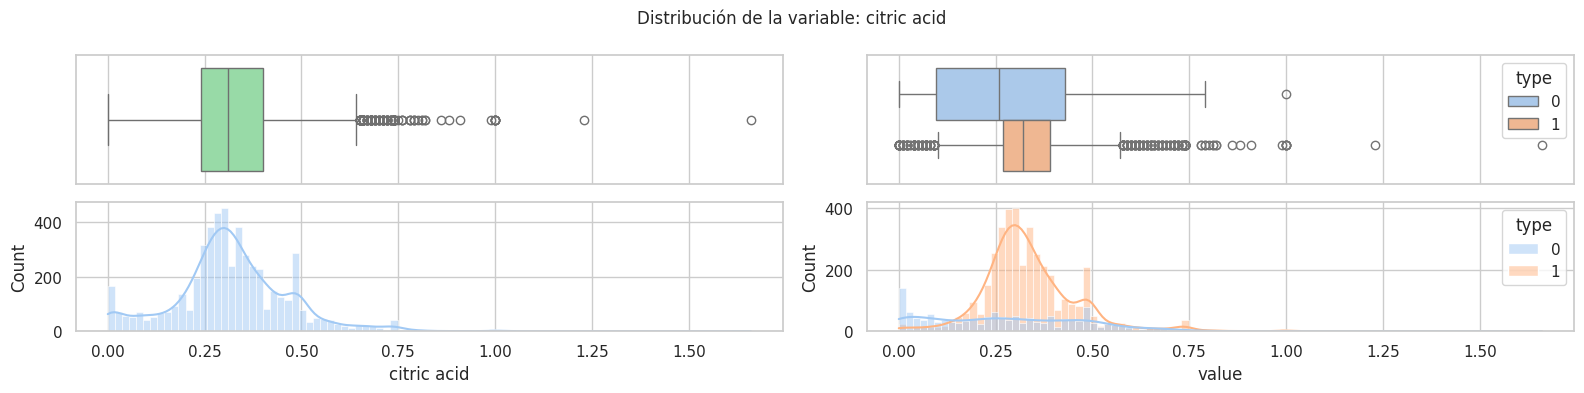

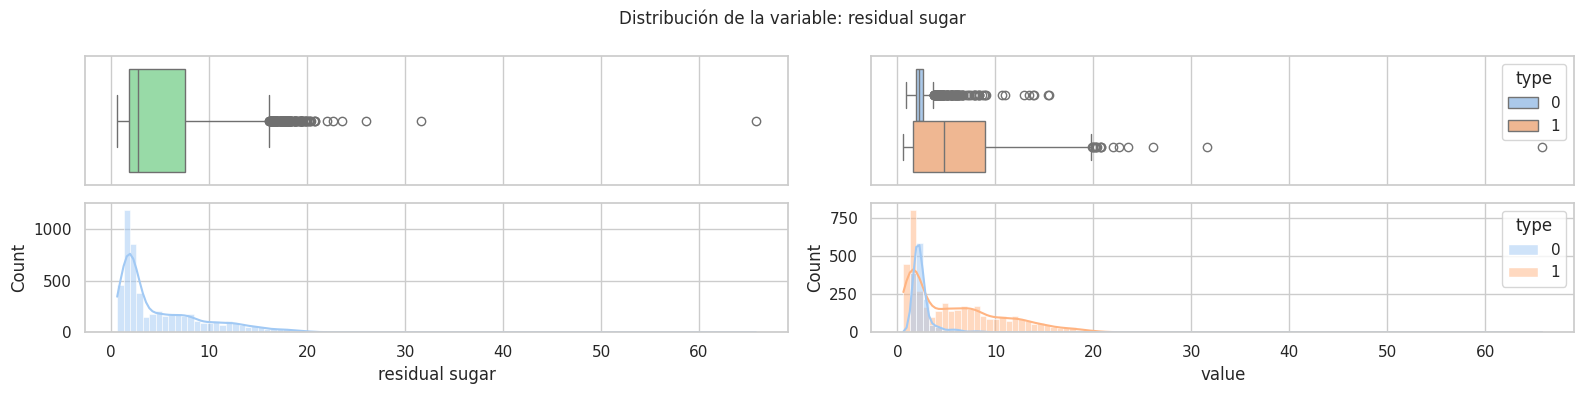

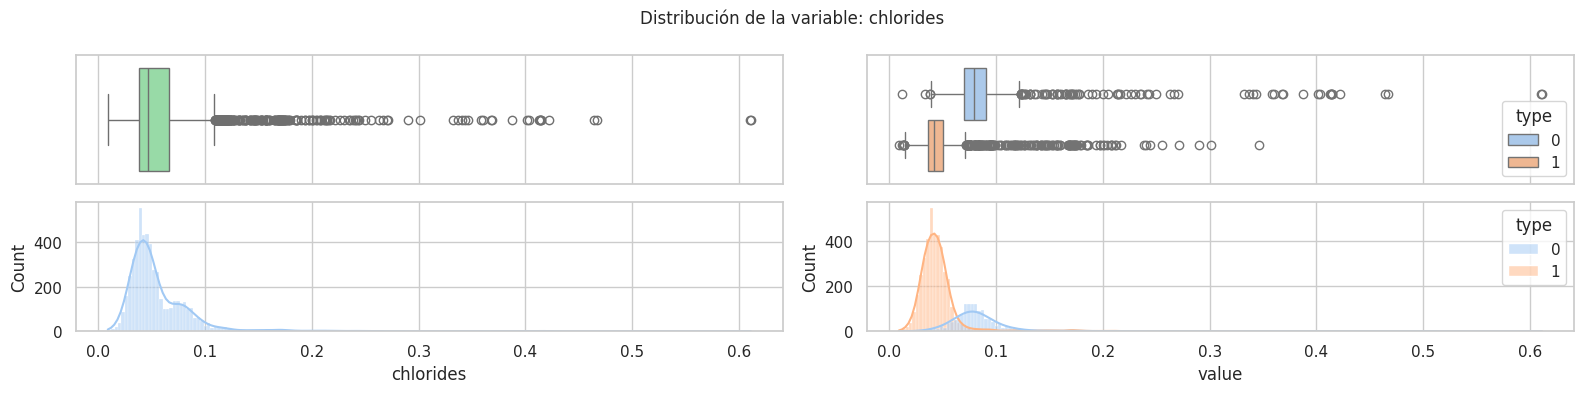

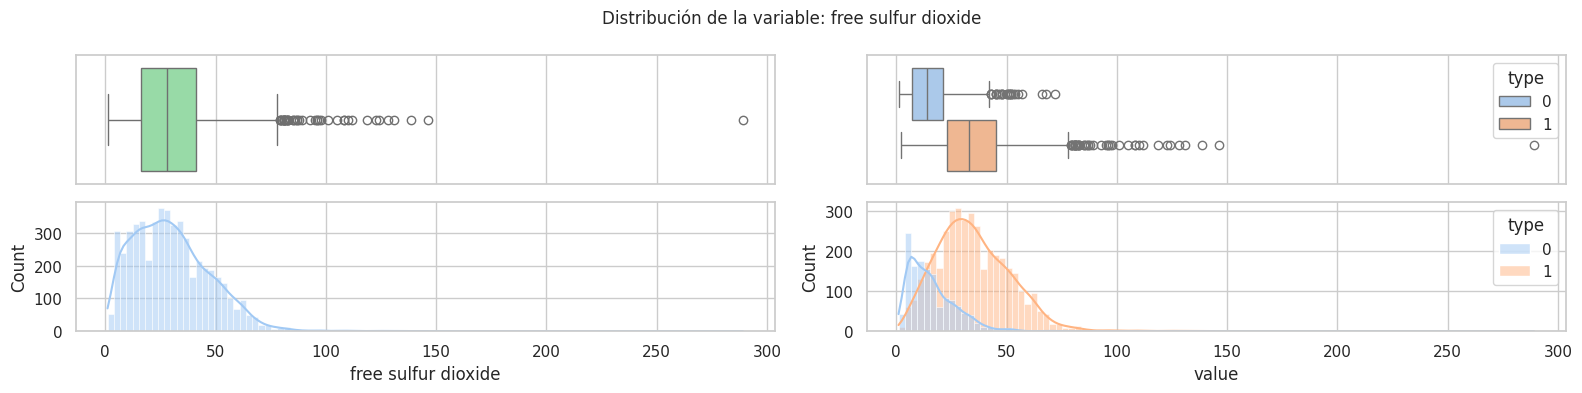

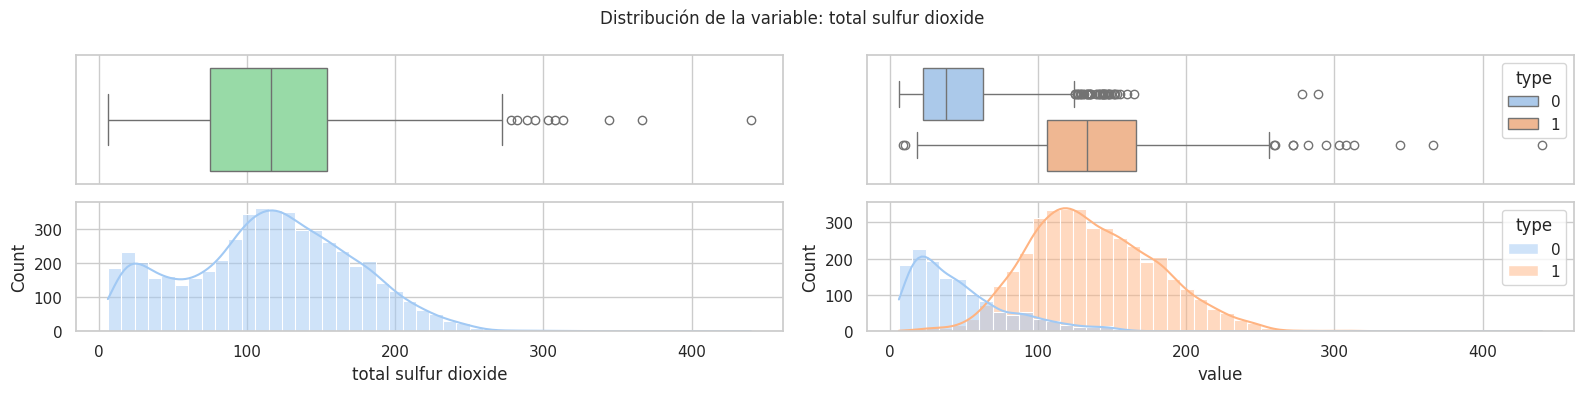

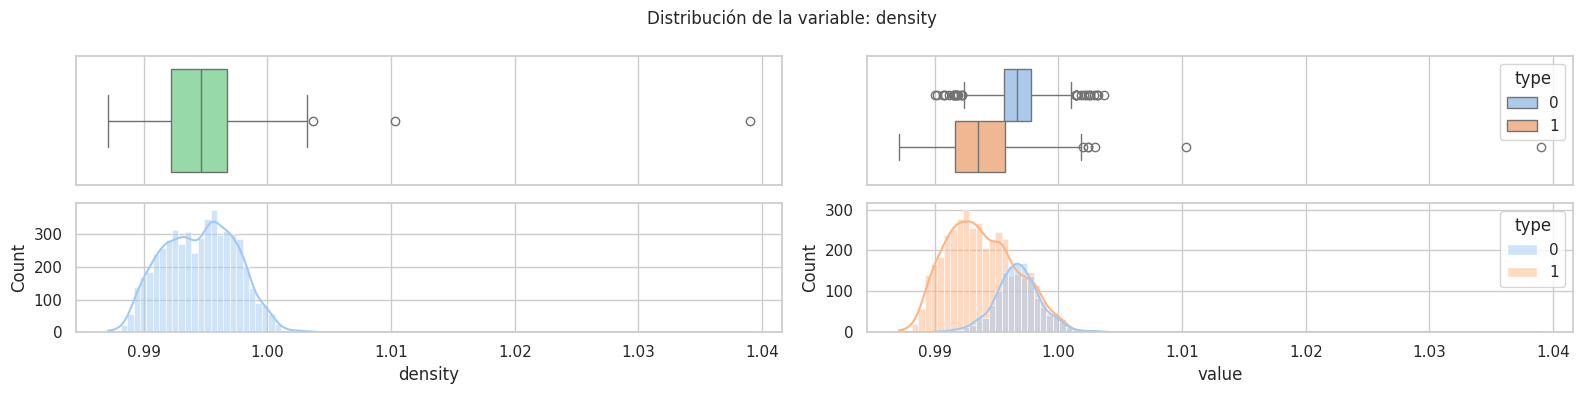

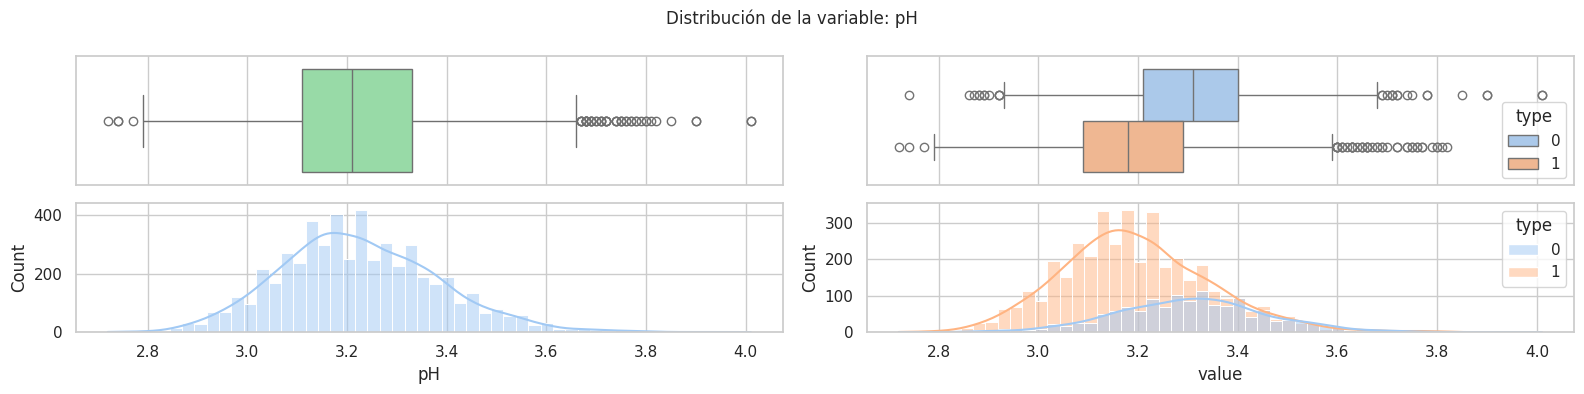

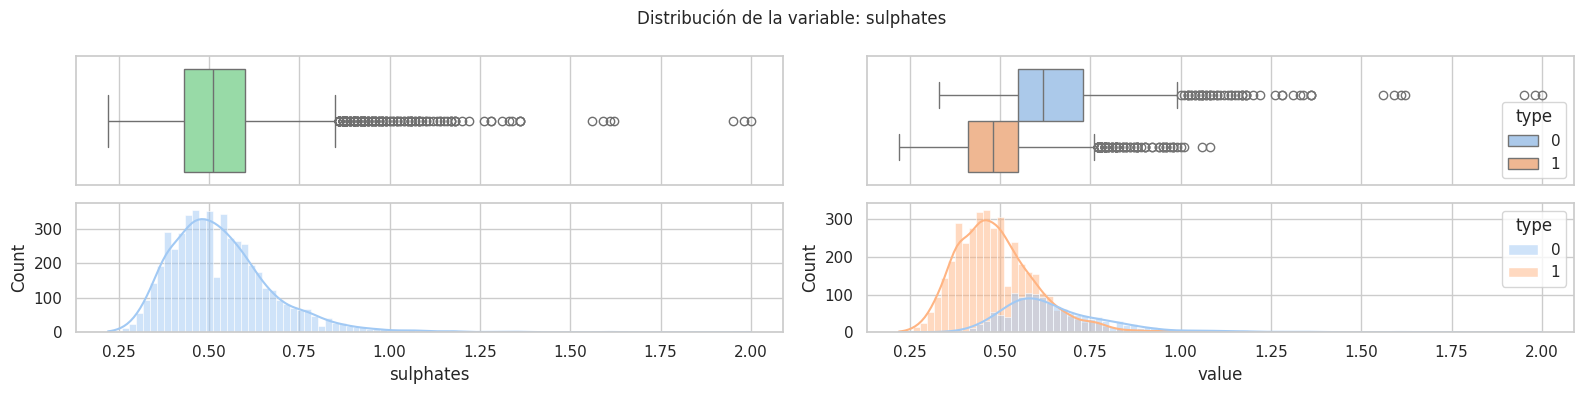

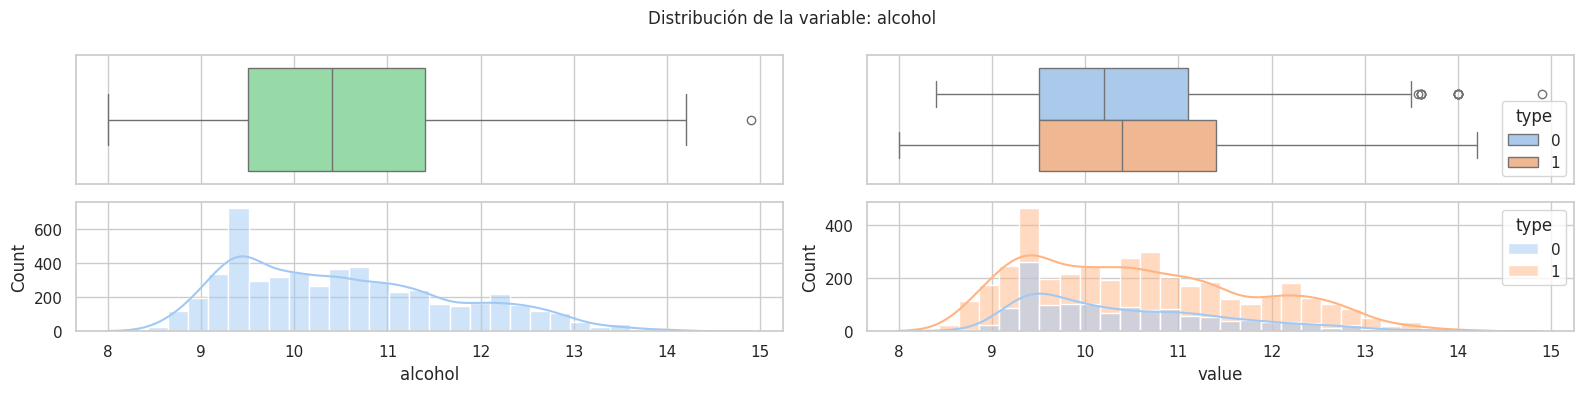

In [63]:
# Se analizan en detalle las distribuciones según el tipo de vino.

numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 2, figsize=(16, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], color='#8DE5A1' , ax=axes[0,0])
    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0,1])
    sns.histplot(df[feature], kde=True, ax=axes[1,0])  # Se usa histplot con kde=True para incluir la curva de densidad
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1,1])
    #axes[0].grid()
    #axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()

# 🟡 OJO

#### Si bien existen outliers para las variables bajo estudio, en general, los mismos se encuentran dentro del dominio esperado y no serán ajustados. No obstante, se analizará con mayor detalle el caso de los outliers asociados a los niveles de azufre que están por encima del valor máximo admisible.

In [ ]:
outlierRS_df = df[df['residual sugar'] > 45]
print("Cantidad outliers en 'residual sugar': ",outlierRS_df['residual sugar'].count())
#print(outlierRS_df['residual sugar'])

outlierFSD_df = df[df['free sulfur dioxide'] > 70]
print("Cantidad outliers en 'free sulfur dioxide': ",outlierFSD_df['free sulfur dioxide'].count())
#print(outlierFSD_df['free sulfur dioxide'])

outlierTSD_df = df[df['total sulfur dioxide'] > 350]
print("Cantidad outliers en 'total sulfur dioxide': ",outlierTSD_df['total sulfur dioxide'].count())
#print(outlierTSD_df['total sulfur dioxide'])
df.shape


In [ ]:
# Se borran los outliers
#outliers = df[df['free sulfur dioxide'] > 70] + df[df['residual sugar'] > 45] + df[df['total sulfur dioxide'] > 350]
#df = df.drop(outliers.index)
#df.shape

### **🔹 Análisis de corelación**

Analizo la correlación de las variables por tipo de vino.

In [ ]:
# Elimino las columnas que no deseo correlacionar (o son categóricas) del DataFrame a correlacionar
df_corr = df.drop(['gama', 'gamaNro'], axis=1)

# Separo los datos por tipo de vino
dfWhite = df_corr[df_corr['type'] == 1]
dfWhite = dfWhite.drop(['type'], axis=1)
dfRed = df_corr[df_corr['type'] == 0]
dfRed = dfRed.drop(['type'], axis=1)

# Genero las matrices de correlación
dfWhiteCorr = dfWhite.corr()
dfRedCorr = dfRed.corr()

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))                  # Define el lienzo de la visualización
cmap = sns.diverging_palette(230, 20, as_cmap=True)                 # Define el mapa de colores

# Genero los mapas de calor por tipo de vino
# WHITE
mask = np.triu(np.ones_like(dfWhiteCorr, dtype=bool))               # Máscara para la parte superior del mapa de calor
sns.heatmap(dfWhiteCorr, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot=True, annot_kws={'size': 6.5}, ax=ax1)
ax1.set_title('Matriz de Correlación WHITE')
# RED
mask = np.triu(np.ones_like(dfRedCorr, dtype=bool))                 # Máscara para la parte superior del mapa de calor
sns.heatmap(dfRedCorr, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot=True, annot_kws={'size': 6.5}, ax=ax2)
ax2.set_title('Matriz de Correlación RED')

plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
plt.show()

# **🟡 ATENCION Averiguar al respecto!**
Se observa mayor correlación positiva entre las siguientes variables (lo cual es esperable):
* "free sulfur dioxide" y "total sulfur dioxide"
* "density" y "residual sugar"

Del mismo modo, hay una mayor correlación negativa entre el nivel de alcohol y la densidad del vino (lo cual también es esperable).

Por su parte, llaman la atención:
* la correlación entre el tipo de vino y el Dióxido de azúfre total.
* la correlación negativa entre el tipo de vino y la acidez volátil.

In [ ]:
# Se relacionan la acidez fija y la acidez volatil con la calidad del vino

df_high_quality = df[df['quality'] > 6]

plt.figure(figsize=(10, 6))

sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='quality', data=df_high_quality, palette='viridis')
plt.title('Relación entre Acidez Fija, Acidez Volátil y Calidad del Vino')
plt.xlabel('Acidez Fija')
plt.ylabel('Acidez Volátil')
plt.show()


No se observa relación entre la acidez fija y la acidez volátil en los vinos mejor puntuados.